# Spark Funds Investment Analysis

Spark Funds is an Asset Management Company, and is looking for companies to invest in.

Objectives: the objective of the analysis is to identify the suitable companies to invest in considering their budget of $5-15million and the requirement of an English Speaking Country
The factors that are considered to achieve this objective are: 
1. Funding Type 
2. Country
3. Sector 

Before moving on to the analysis, it is important to import the data and clean it. This is necessary to attain reliable analysis. 

-------------------------------------

## Pre-processing Data
1. Import the data: companies, round2 and mapping
2. Cleaning the data

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:20,.2f}'.format
pd.options.mode.chained_assignment = None

In [2]:
companies = pd.read_csv("companies.txt",sep="\t", encoding="raw_unicode_escape")
companies.permalink.unique()

array(['/Organization/-Fame', '/Organization/-Qounter',
       '/Organization/-The-One-Of-Them-Inc-', ...,
       '/Organization/Ã\x81Eron', '/Organization/Ã\x94Asys-2',
       '/Organization/Ä°Novatiff-Reklam-Ve-Tanä±Tä±M-Hizmetleri-Tic'],
      dtype=object)

In [3]:
rounds2 = pd.read_csv("rounds2.csv",encoding="raw_unicode_escape")
rounds2.company_permalink.unique()

array(['/organization/-fame', '/ORGANIZATION/-QOUNTER',
       '/organization/-qounter', ..., '/organization/ã\x81eron',
       '/ORGANIZATION/Ã\x94ASYS-2',
       '/organization/ä°novatiff-reklam-ve-tanä±tä±m-hizmetleri-tic'],
      dtype=object)

In [4]:
main_sector_mapping = pd.read_csv("mapping.csv", encoding="raw_unicode_escape")

### Data Cleaning
Now that the 3 datasets are imported, it's time to start cleaning the data. The tasks in this part include:
1. Remove the special characters from the dataframe
2. Lower case the permalinks, company_permalinks, category_list, category
3. Mapping, replace 0 with na for the categories

#### Step 1: Removing special characters
It is seen that despite encoding that are special characters in the string that can hamper the quality of data. That's why it is necessary to clean them using *re*

In [5]:
companies["permalink"] = companies.permalink.map(lambda permalink: re.sub('[^A-Za-z-/\s]+', '',permalink))
companies["permalink"].unique()

array(['/Organization/-Fame', '/Organization/-Qounter',
       '/Organization/-The-One-Of-Them-Inc-', ..., '/Organization/Eron',
       '/Organization/Asys-',
       '/Organization/Novatiff-Reklam-Ve-TanTM-Hizmetleri-Tic'],
      dtype=object)

In [6]:
rounds2["company_permalink"] = rounds2.company_permalink.map(lambda permalink: re.sub('[^A-Za-z-/\s]+', '',permalink))
rounds2["company_permalink"].unique()

array(['/organization/-fame', '/ORGANIZATION/-QOUNTER',
       '/organization/-qounter', ..., '/organization/eron',
       '/ORGANIZATION/ASYS-',
       '/organization/novatiff-reklam-ve-tantm-hizmetleri-tic'],
      dtype=object)

#### Step 2: Lower case the permalinks and company_permalinks

In [7]:
companies["permalink"] = companies["permalink"].str.lower()
rounds2["company_permalink"] = rounds2["company_permalink"].str.lower()
main_sector_mapping["category_list"] = main_sector_mapping["category_list"].str.lower()

#### Step 3: Replaces the 0 with na for categories

In [8]:
main_sector_mapping["category_list"] = main_sector_mapping["category_list"].map(lambda category: str(category).replace('0', 'na'))
main_sector_mapping["category_list"] = main_sector_mapping["category_list"].map(lambda permalink: re.sub('[^A-Za-z-/\s]+', '',permalink))

---------------------------------------------

## Checkpoint 1
1. The unique companies present in rounds2

In [9]:
rounds2["company_permalink"].nunique()

66146

2. The unique companies present in companies

In [10]:
companies["permalink"].nunique()

66146

In [11]:
master_frame = pd.merge(rounds2,companies,how='inner',left_on="company_permalink",right_on="permalink")
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,"10,000,000.00",/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,"700,000.00",/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,"3,406,878.00",/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/--com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,"2,000,000.00",/organization/--com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


5. The observations in the master_frame after merging

In [12]:
master_frame.shape

(116033, 16)

In [13]:
master_frame.nunique()

company_permalink           66146
funding_round_permalink    114949
funding_round_type             14
funding_round_code              8
funded_at                    5033
raised_amount_usd           22095
permalink                   66146
name                        66102
homepage_url                61191
category_list               27296
status                          4
country_code                  137
state_code                    311
region                       1092
city                         5111
founded_at                   3978
dtype: int64

------------------------------------------------------

## Checkpoint 2: Funding Type Analysis

The difference between the unique company permalinks and the funding round permalink, indicates that companies have had multiple rounds of funding.

Before moving on to identifying which funding type is suitable for Spark Funds, I think the dataset needs to be checked for Nan values in the raised_amount_usd column.

The 2 ways to deal with it, would have been to delete it or impute it. 

In this case, considering the fact that the variance is likely to be high since they are directly related to the funding_round_type, I have decided to drop the null values. 

In [14]:
master_frame = master_frame.dropna(subset=["raised_amount_usd"])

In [15]:
funding_types = pd.DataFrame(master_frame.groupby("funding_round_type").raised_amount_usd.mean().sort_values(ascending=True)).reset_index()
funding_types.loc[funding_types["funding_round_type"].isin(["venture","seed","angel","private_equity"])]

,funding_round_type,raised_amount_usd
2,seed,"721,022.19"
3,angel,"958,760.71"
7,venture,"11,770,798.83"
10,private_equity,"73,247,240.71"


In [16]:
master_frame.groupby('funding_round_code').raised_amount_usd.mean().sort_values(ascending=True)

funding_round_code
A           6,977,269.08
B          14,606,427.77
C          21,527,157.69
D          30,643,690.90
E          46,074,669.18
F          53,426,353.38
G          77,986,035.07
H         140,591,666.67
Name: raised_amount_usd, dtype: float64

### Analysis: 
Based on the mean across the 4 types of funding, it is evident that *Venture* is the most suitable funding type for Spark Funds. The average in this category fits within their budget. 
Additionally it is seen that funding rounds A & B have their average funding fall under the budget. 

Before moving on to the next checkpoint a venture data frame is created to get the observations only for companies that have recieved venture funding in the range of $5-15million


In [17]:
venture_frame = master_frame.loc[(master_frame.funding_round_type == "venture") & (master_frame.raised_amount_usd>5000000) & (master_frame.raised_amount_usd<15000000)]

-----------------------
## Checkpoint 3: Identifying Top 3 Countries

To identify the top 3 countries, manually an array of English speaking countries is made. Based on which the master_frame will be filtered to find the ones with the maximum investment.

To make the array of english speaking countries, I have referred to the countries present in the master_frame along the list provided on Wikipedia. Based on the two, I made an array of countries in the master_frame that have english as their official language.

In [18]:
venture_frame.country_code.unique()

array(['IND', 'USA', 'FRA', 'CHN', nan, 'SGP', 'RUS', 'NLD', 'GBR', 'CAN',
       'BRA', 'ISR', 'DEU', 'HKG', 'SVN', 'JPN', 'SWE', 'THA', 'TWN',
       'MEX', 'IRL', 'DNK', 'MNE', 'ESP', 'BEL', 'AUS', 'CHE', 'EST',
       'ITA', 'AUT', 'NOR', 'HUN', 'NZL', 'ARM', 'KOR', 'FIN', 'TUR',
       'ROM', 'KEN', 'CYP', 'ARE', 'PHL', 'CYM', 'PRT', 'VNM', 'ARG',
       'CHL', 'LVA', 'IDN', 'POL', 'LUX', 'MYS', 'UKR', 'BGR', 'ISL',
       'ZAF', 'KAZ', 'NGA', 'LIE', 'CZE', 'TAN', 'JOR', 'PAK', 'BAH',
       'KWT', 'URY', 'EGY', 'BGD', 'LTU', 'MAF', 'GIB', 'MLT'],
      dtype=object)

In [19]:
english_countries = ['IND','USA','SGP','GBR','CAN','IRL','AUS','NZL','KEN','ARE','PHL','MYS','NGA','JOR','PAK','BAH','KWT','BGD','GIB','MLT','CYM','HKG','ISR']
len(english_countries)

23

In [20]:
top9 = pd.DataFrame(venture_frame.groupby("country_code").raised_amount_usd.agg(['sum']).sort_values(by='sum',ascending=False).reset_index().head(9))
top9.head()

,country_code,sum
0,USA,"90,344,380,521.00"
1,GBR,"5,020,843,539.00"
2,CHN,"4,073,461,053.00"
3,CAN,"3,222,884,577.00"
4,ISR,"2,270,478,963.00"


In [21]:
top3 = top9.loc[(top9.country_code.isin(english_countries))].reset_index(drop=True).head(3)
top3.head()

,country_code,sum
0,USA,"90,344,380,521.00"
1,GBR,"5,020,843,539.00"
2,CAN,"3,222,884,577.00"


### Analysis

The above table clearly indicates that **USA** is leading the game with maximum total amount of investment. The number seems to be much higher compared to the other countries. 
After USA, the next 2 countries are **GBR & CAN**

In [22]:
venture_frame = venture_frame.loc[venture_frame.country_code.isin(top3.country_code)]
venture_frame.country_code.value_counts()

USA    10137
GBR      576
CAN      372
Name: country_code, dtype: int64

-----------------------
## Checkpoint 4 - Sector Analysis

It's time to now identify the sectors that are attracting more investments. 
Before we do that, we need to narrow down the numerous categories to 8 main sectors.

#### Step 1: Getting the primary sector

In [23]:
venture_frame["primary_sector"] = venture_frame.category_list.str.split('|').str[0]
venture_frame["primary_sector"] = venture_frame["primary_sector"].str.lower()
venture_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector
15,/organization/-technologies,/funding-round/786f61aa9866f4471151285f5c56be36,venture,A,03-02-2010,"5,150,000.00",/organization/-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,software
16,/organization/-technologies,/funding-round/786f61aa9866f4471151285f5c56be36,venture,A,03-02-2010,"5,150,000.00",/organization/-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,manufacturing
17,/organization/-technologies,/funding-round/82ace97530965cd2be8f262836b43ff5,venture,A,27-03-2008,"12,400,000.00",/organization/-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,software
18,/organization/-technologies,/funding-round/82ace97530965cd2be8f262836b43ff5,venture,A,27-03-2008,"12,400,000.00",/organization/-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,manufacturing
19,/organization/-technologies,/funding-round/ab99fc5a53717b1b53fd6aa5687c5fa9,venture,B,16-12-2010,"6,000,000.00",/organization/-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,software


#### Step 2: Mapping to get the main sector

In [24]:
venture_frame = venture_frame.dropna(subset=["primary_sector"])

* Checking if all the rows have singular 1 value

In [25]:
print("Sum of values", np.sum(main_sector_mapping.iloc[:,1:]).sum())
print("Rows in main_sector_mapping",main_sector_mapping.shape[0])

Sum of values 688
Rows in main_sector_mapping 688


In [26]:
main_sector_mapping['main_sector'] = main_sector_mapping.iloc[:,1:].idxmax(axis=1)
main_sector_mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_sector
0,nan,0,1,0,0,0,0,0,0,0,Blanks
1,d,0,0,0,0,0,1,0,0,0,Manufacturing
2,d printing,0,0,0,0,0,1,0,0,0,Manufacturing
3,d technology,0,0,0,0,0,1,0,0,0,Manufacturing
4,accounting,0,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"


In [27]:
#Mapping the main_sectors to the venture_frame while checking 
#if the primary category exists in the category_list, if not then it is assumed to be in Others
venture_frame['main_sector'] = list(map(lambda category: 
                                  main_sector_mapping.loc[main_sector_mapping.category_list == category,"main_sector"].values[0]
                                  if category in main_sector_mapping.values
                                  else
                                  "Others"
                                  ,venture_frame["primary_sector"]))
venture_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
15,/organization/-technologies,/funding-round/786f61aa9866f4471151285f5c56be36,venture,A,03-02-2010,"5,150,000.00",/organization/-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,software,Others
16,/organization/-technologies,/funding-round/786f61aa9866f4471151285f5c56be36,venture,A,03-02-2010,"5,150,000.00",/organization/-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,manufacturing,Manufacturing
17,/organization/-technologies,/funding-round/82ace97530965cd2be8f262836b43ff5,venture,A,27-03-2008,"12,400,000.00",/organization/-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,software,Others
18,/organization/-technologies,/funding-round/82ace97530965cd2be8f262836b43ff5,venture,A,27-03-2008,"12,400,000.00",/organization/-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007,manufacturing,Manufacturing
19,/organization/-technologies,/funding-round/ab99fc5a53717b1b53fd6aa5687c5fa9,venture,B,16-12-2010,"6,000,000.00",/organization/-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,software,Others


##### Since only 8 sectors need to be considered, and because Blanks sectors just includes nan values, those values are dropped

In [28]:
venture_frame.drop(venture_frame.index[venture_frame.main_sector=="Blanks"], inplace = True)

---------------------

## Checkpoint 5: Sector Analysis 2
Now that the sectors are narrowed down to 8 main sectors, the analysis for each country can be done based on the sectors. 

Since the functions for this analysis is similar for all the 3 dataframes, I have made 2 functions for this purpose. 

In [29]:
#Creates the dataframe for the country
def create_dataframe(country):
    dataframe = venture_frame.loc[venture_frame.country_code == country]
    dataframe["investment-total"] = dataframe.groupby('main_sector')['raised_amount_usd'].transform(np.sum)
    dataframe["investment-count"] = dataframe.groupby('main_sector')['raised_amount_usd'].transform('count')
    return dataframe    

In [30]:
#Returns the analysis for the country based on the top sectors
def sector_analysis(dataframe):
    print("Total No.of Investments: ", dataframe.raised_amount_usd.count())
    print("Total Amount of Investment: ", dataframe.raised_amount_usd.sum())
    sectors = dataframe.main_sector.value_counts().sort_values(ascending=False).head(3)
    print("Top 3 Sectors: \n", sectors)
    print("Top 1 sector, company with highest investment: ", dataframe.loc[dataframe.main_sector == sectors.index[0]].sort_values(by="raised_amount_usd",ascending=False).head(1).name)
    print("Top 2 sector, company with highest investment: ", dataframe.loc[dataframe.main_sector == sectors.index[1]].sort_values(by="raised_amount_usd",ascending=False).head(1).name)

In [31]:
D1 = create_dataframe(top3.country_code[0])
sector_analysis(D1)

Total No.of Investments:  10068
Total Amount of Investment:  89741792197.0
Top 3 Sectors: 
 Others                                     2767
Social, Finance, Analytics, Advertising    2212
Cleantech / Semiconductors                 1994
Name: main_sector, dtype: int64
Top 1 sector, company with highest investment:  94526    SpiderCloud Wireless
Name: name, dtype: object
Top 2 sector, company with highest investment:  37201    Flite
Name: name, dtype: object


#### Country 2 Analysis

In [32]:
D2 = create_dataframe(top3.country_code[1])
sector_analysis(D2)

Total No.of Investments:  569
Total Amount of Investment:  4954078691.0
Top 3 Sectors: 
 Others                                     147
Cleantech / Semiconductors                 127
Social, Finance, Analytics, Advertising    117
Name: main_sector, dtype: int64
Top 1 sector, company with highest investment:  66146    MyOptique Group
Name: name, dtype: object
Top 2 sector, company with highest investment:  71705    Onyvax
Name: name, dtype: object


#### Country 3 Analysis

In [33]:
D3 = create_dataframe(top3.country_code[2])
sector_analysis(D3)

Total No.of Investments:  369
Total Amount of Investment:  3190164959.0
Top 3 Sectors: 
 Others                                     110
Cleantech / Semiconductors                  98
Social, Finance, Analytics, Advertising     68
Name: main_sector, dtype: int64
Top 1 sector, company with highest investment:  68395    NewStep Networks
Name: name, dtype: object
Top 2 sector, company with highest investment:  38382    Fresco Microchip
Name: name, dtype: object


### Overall Analysis

Based on the data gathered, it is evident that the most popular main_sectors across the 3 countries are 
1. Others
2. Cleantech/ Semiconductors
3. Social, Finance, Analytics, Advertising

-------------------
## Checkpoint 6: Plotting the graphs

### Graph 1: showing the mean of the 3 different funding types
The graph evidently shows that Venture funding is the most suitable of all. 

Chose a box plot because it indicates the different points(outliers,mean,etc) for each funding type while also giving a clear idea of where the mean lies.

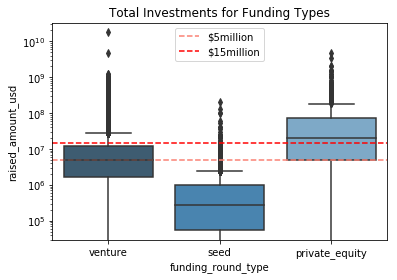

In [34]:
funding = master_frame.loc[master_frame.funding_round_type.isin(["venture","seed","private_equity"])]
sns.boxplot(x="funding_round_type",y="raised_amount_usd",data=funding, palette="Blues_d")
lower_limit = plt.axhline(y=5000000,color="salmon",linestyle="--")
upper_limit = plt.axhline(y=15000000,color="red",linestyle="--")
plt.legend([lower_limit,upper_limit],["$5million","$15million"])
plt.yscale('log')
plt.title('Total Investments for Funding Types')
plt.show()

### Graph 2: Top 9 countries
Decided to use a bar chart to clearly show the fundings by each of the top 9 countries and identifying the top english speaking countries.

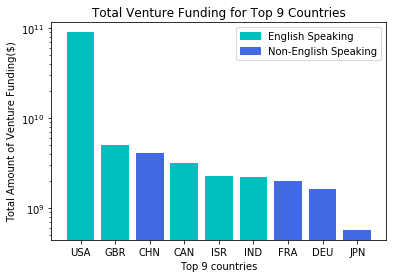

In [35]:
import matplotlib.patches as mpatches
english = 'c'
non_english = 'royalblue'
colors = [english if top9.country_code.iloc[country] in english_countries else non_english for country in range(len(top9.country_code))]
plt.bar(x="country_code",height="sum",data=top9, color=colors)

english_patch = mpatches.Patch(color=english, label='English Speaking')
non_english_patch = mpatches.Patch(color=non_english, label='Non-English Speaking')
plt.legend(handles = [english_patch,non_english_patch] )
plt.yscale('log')
plt.ylabel("Total Amount of Venture Funding($)")
plt.xlabel("Top 9 countries")
plt.title('Total Venture Funding for Top 9 Countries')
plt.show()

### Graph 3:The top 3 sectors across top 3 countries

In this situation, grouped bar chart seemed like an ideal option to clearly show both the factors: Top 3 countries and Top 3 Sectors for those countries.

In [36]:
sectors = D1.main_sector.value_counts().sort_values(ascending=False).head(3)
venture_frame = venture_frame.loc[venture_frame.main_sector.isin(sectors.index)]

In [37]:
graph3 = venture_frame.groupby(['main_sector','country_code']).raised_amount_usd.agg(['count']).reset_index()
graph3.head()

,main_sector,country_code,count
0,Cleantech / Semiconductors,CAN,98
1,Cleantech / Semiconductors,GBR,127
2,Cleantech / Semiconductors,USA,1994
3,Others,CAN,110
4,Others,GBR,147


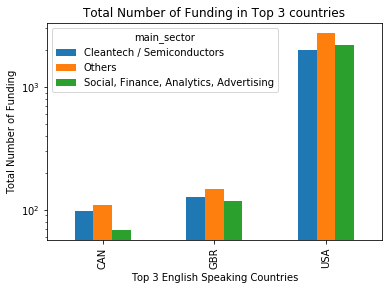

In [38]:
graph3.pivot(index="country_code",columns="main_sector",values="count").plot.bar()
plt.yscale('log')
plt.ylabel("Total Number of Funding")
plt.xlabel("Top 3 English Speaking Countries")
plt.title('Total Number of Funding in Top 3 countries')
plt.show()

## Conclusion

In conclusion, Spark Funds can look into **Venture** funding across different countries: 
1. USA
2. United Kingdom
3. Canada

These countries are the top english speaking countries that are attracting high amounts of funding especially USA. 
It is seen that there is common popularity of sector across these top countries. Some sectors are getting higher number of investments such as:
* Cleantech/ Semiconductors
* Social, Finance, Analytics, Advertising
* Others: edtech, web development, software,training, task management,etc 